Nama : Ismy Fana Fillah\
NIM : G6401211001\
Nama Dosen : Dr. Karlisa Priandana S.T., M.Eng.\
Nama Asistem : Ahmad Bintang Arif

LKP 4 PCD - Warna (Color Space)

In [1]:
# import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Load gambar citra melon.jpeg

In [2]:
# baca citra gambar
img = cv2.imread('melon.jpeg')

In [3]:
# tampilkan citra gambar
cv2.imshow('melon', img)
cv2.waitKey(0)

-1

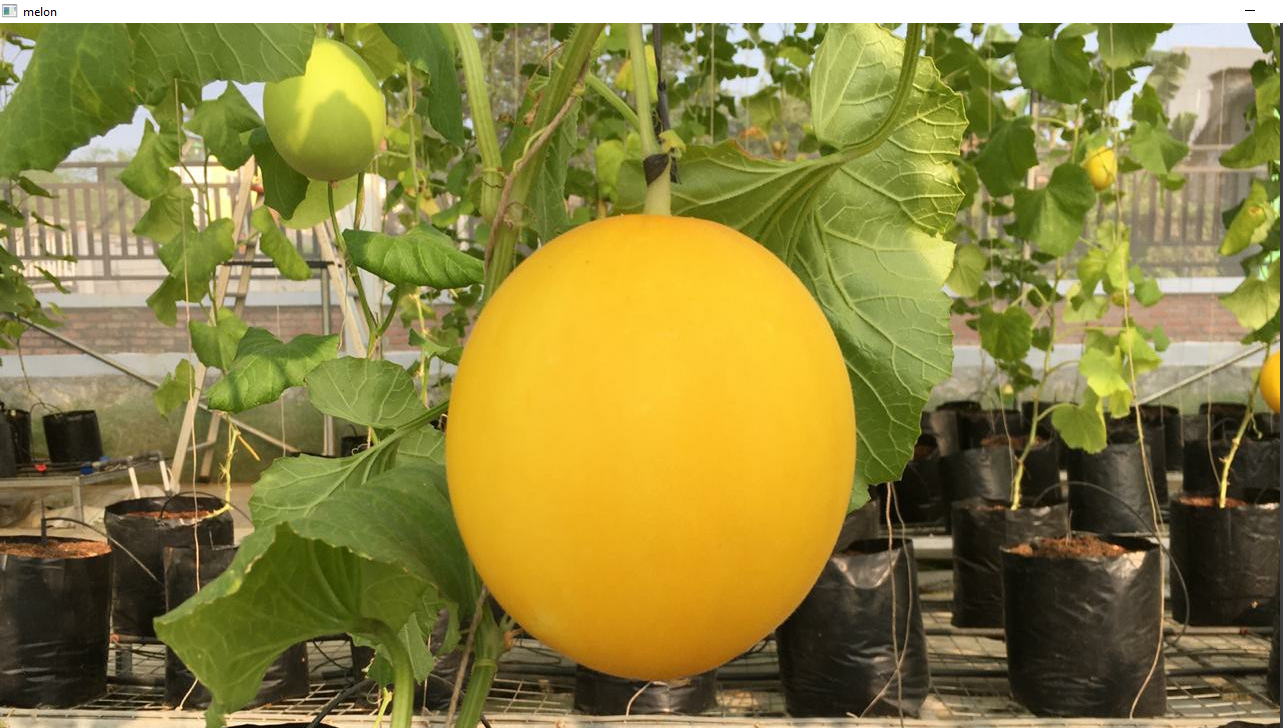

2. Ubah citra tersebut menjadi HSV dan L*a*b color space

In [4]:
# convert to rgb
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# convert to hsv
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# convert to L*a*b
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

3. Split setiap channel pada RGB, HSV, dan L*a*b color space

In [5]:
# Split BGR color space
red, green, blue = cv2.split(rgb_img)

# Split HSV color space
hue, sat, val = cv2.split(hsv_img)

# Split LAB color space
lig, ach, bch = cv2.split(lab_img)

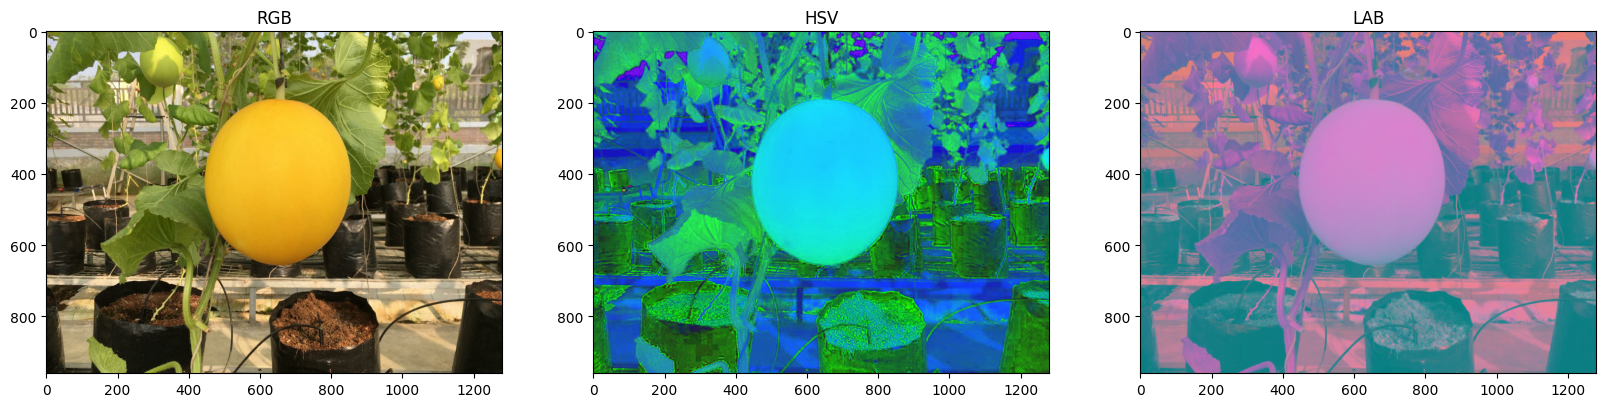

In [6]:
# Perbandingan citra RGB, HSV, LAB
fig, ax = plt.subplots(1, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('RGB')
ax[0,0].imshow(rgb_img, vmin=0, vmax=255)

ax[0,1].set_title('HSV')
ax[0,1].imshow(hsv_img, vmin=0, vmax=255)

ax[0,2].set_title('LAB')
ax[0,2].imshow(lab_img, vmin=0, vmax=255)

plt.show()

4. Analisis citra hasil split tersebut, pilih salah satu color space yang paling memungkinkan untuk mengidentifikasi secara jelas objek melon dengan background

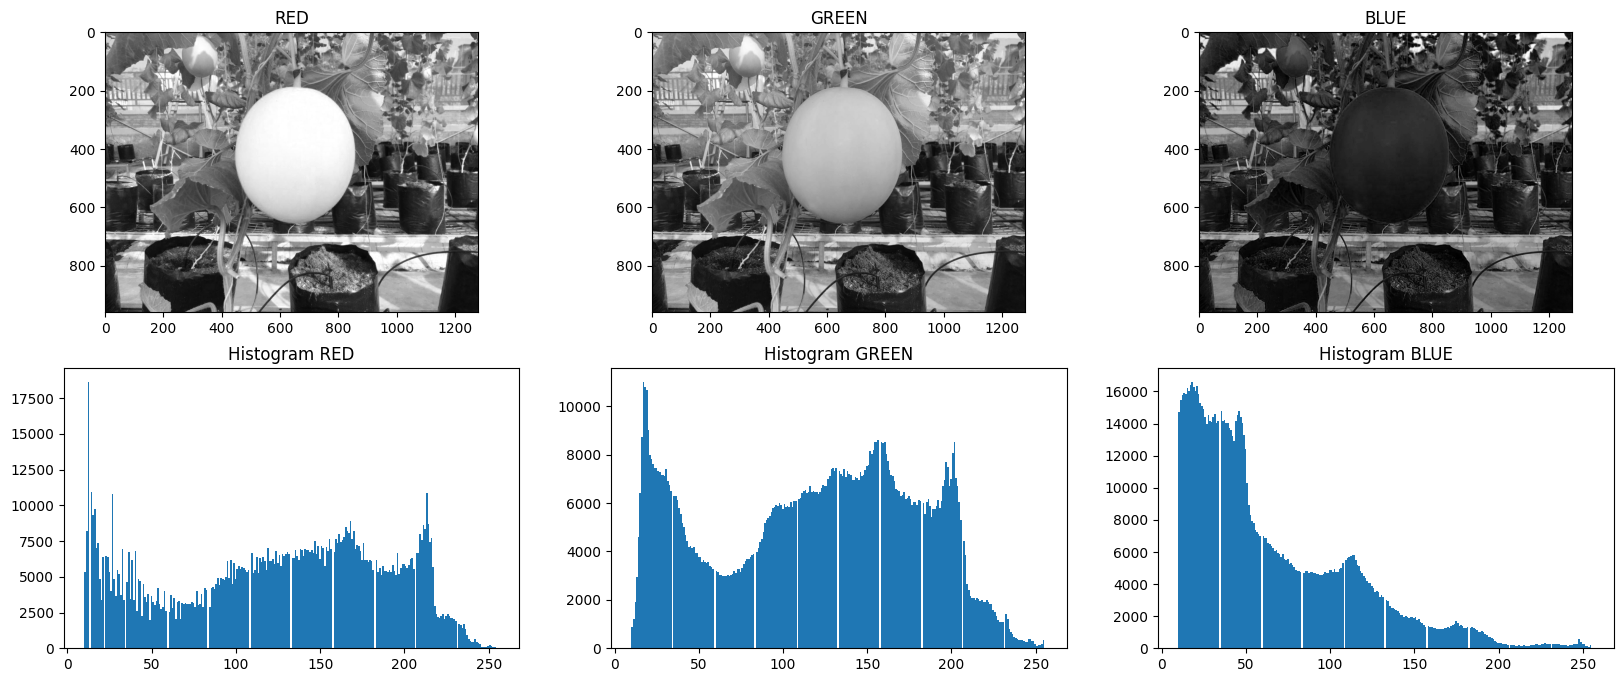

In [7]:
# RGB
fig, ax = plt.subplots(2, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('RED')
ax[0,0].imshow(red, cmap="gray", vmin=0, vmax=255)
ax[1,0].set_title('Histogram RED')
ax[1,0].hist(lig.ravel(), 256, [10,256])

ax[0,1].set_title('GREEN')
ax[0,1].imshow(green, cmap="gray", vmin=0, vmax=255)
ax[1,1].set_title('Histogram GREEN')
ax[1,1].hist(green.ravel(), 256, [10,256])

ax[0,2].set_title('BLUE')
ax[0,2].imshow(blue, cmap="gray", vmin=0, vmax=255)
ax[1,2].set_title('Histogram BLUE')
ax[1,2].hist(blue.ravel(), 256, [10, 256])

plt.show()

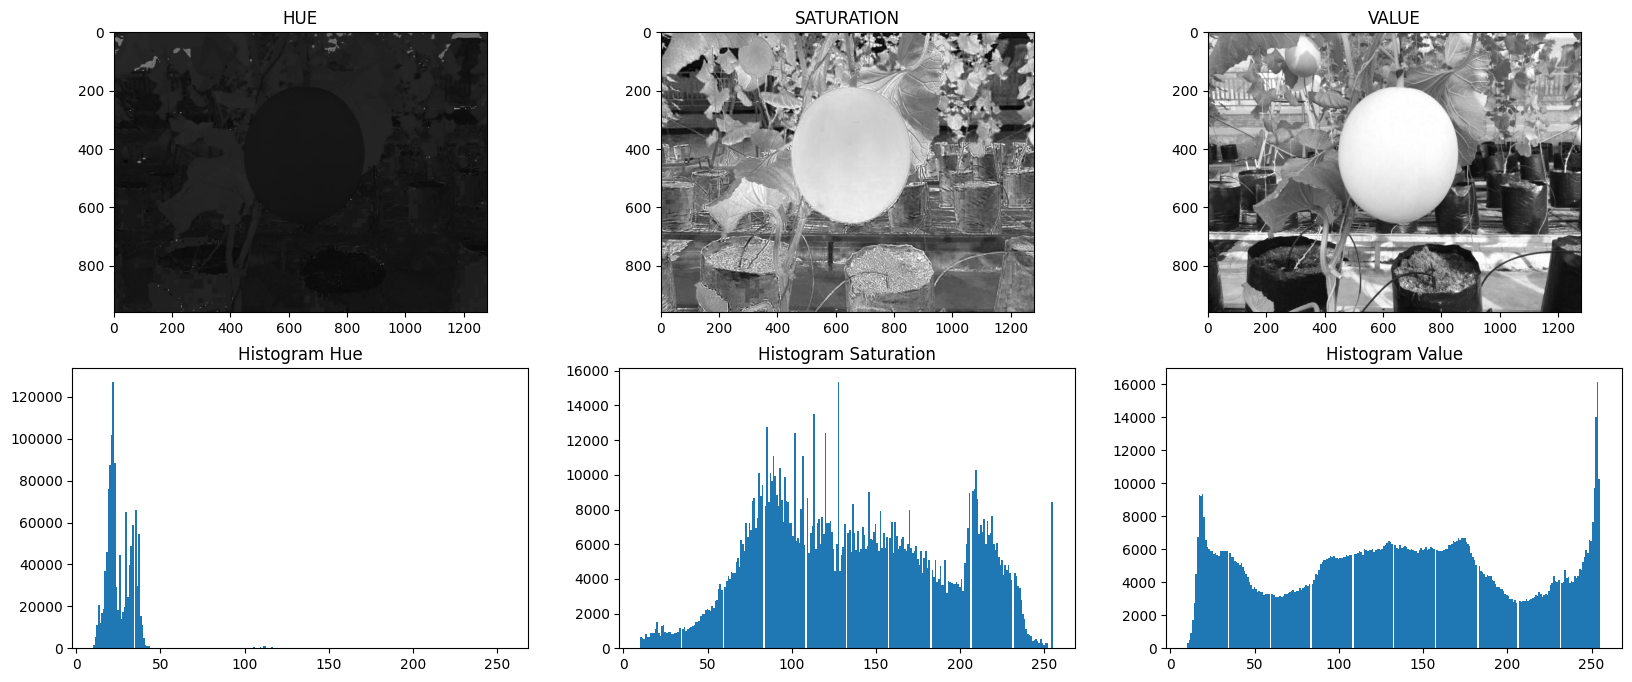

In [8]:
# HSV
fig, ax = plt.subplots(2, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('HUE')
ax[0,0].imshow(hue, cmap="gray", vmin=0, vmax=255)
ax[1,0].set_title('Histogram Hue')
ax[1,0].hist(hue.ravel(), 256, [10,256])

ax[0,1].set_title('SATURATION')
ax[0,1].imshow(sat, cmap="gray", vmin=0, vmax=255)
ax[1,1].set_title('Histogram Saturation')
ax[1,1].hist(sat.ravel(), 256, [10,256])

ax[0,2].set_title('VALUE')
ax[0,2].imshow(val, cmap="gray", vmin=0, vmax=255)
ax[1,2].set_title('Histogram Value')
ax[1,2].hist(val.ravel(), 256, [10, 256])

plt.show()

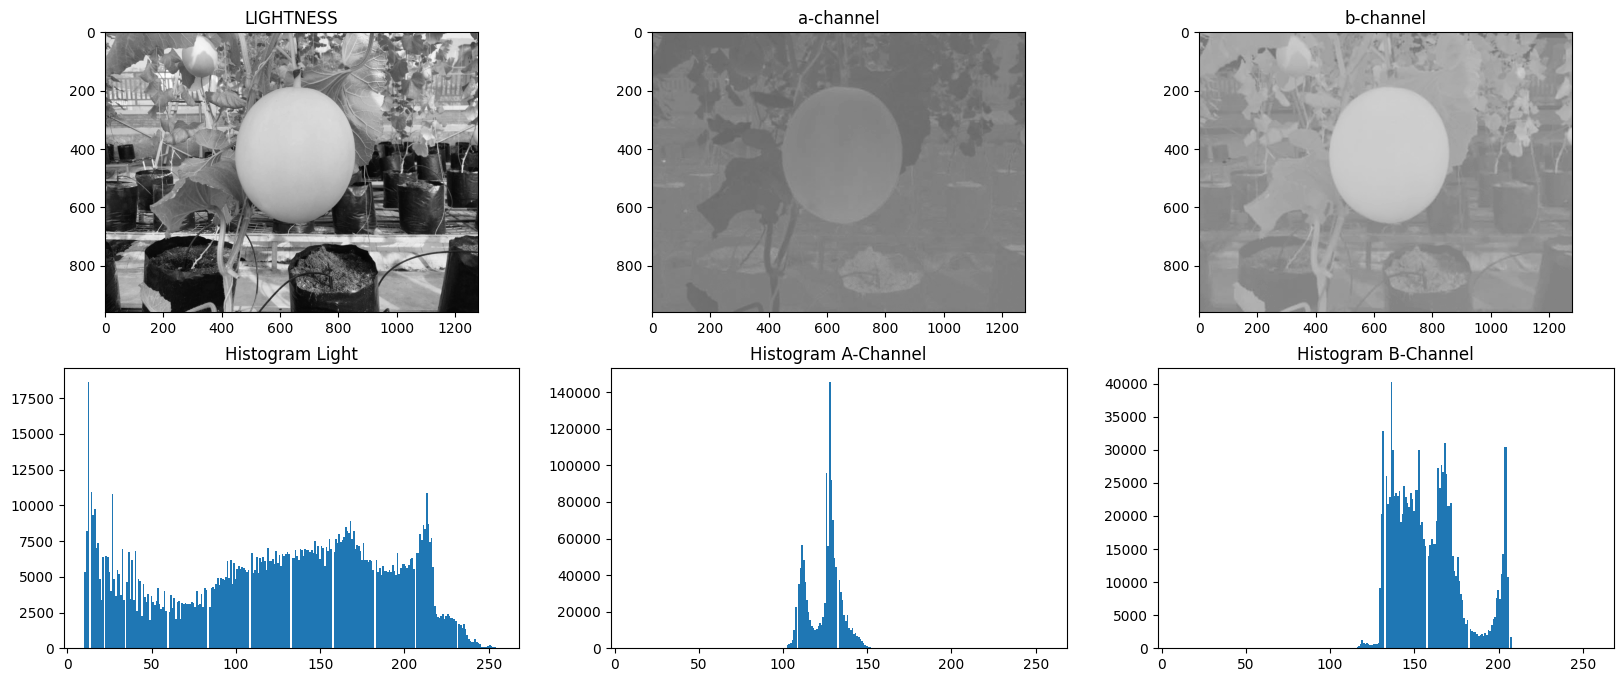

In [9]:
# LAB
fig, ax = plt.subplots(2, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('LIGHTNESS')
ax[0,0].imshow(lig, cmap="gray", vmin=0, vmax=255)
ax[1,0].set_title('Histogram Light')
ax[1,0].hist(lig.ravel(), 256, [10,256])

ax[0,1].set_title('a-channel')
ax[0,1].imshow(ach, cmap="gray", vmin=0, vmax=255)
ax[1,1].set_title('Histogram A-Channel')
ax[1,1].hist(ach.ravel(), 256, [10,256])

ax[0,2].set_title('b-channel')
ax[0,2].imshow(bch, cmap="gray", vmin=0, vmax=255)
ax[1,2].set_title('Histogram B-Channel')
ax[1,2].hist(bch.ravel(), 256, [10, 256])

plt.show()

Berdasarkan hasil diatas, ditunjukkan bahwa channel pada color space (RGB, HSV,L*a*b) ditentukan dari penggunaan fungsi cv2.split yang dilakukan pada langkah sebelumnya dan selanjutnya ditampilkan dengan map grayscale untuk membandingkan hasil perbedaaan warna pada masing-masing channel yang digunakan untuk memilih salah satu color space yang paling memungkinkan untuk mengidentifikasi secara jelas objek melon dengan background. Berdasarkan perbandingan citra yang dihasilkan masing-masing chanel, dipilih b-channel (bch) pada L*a*b color space sebagai background karena terlihat perbedaan intensitas cahaya (kecerahan) antara melon dan backgroundnya.

5. Tentukan nilai thresholding pada masing-masing channel pada color space yang dipilih.

Nilai thresholding dapat diubah sesuai kebutuhan atau penyesuaian yang diinginkan. Penentuan nilai tresholding dilakukan secara random dengan mencoba berbagai nilai yang paling sesuai untuk menghasilkan segmentasi objek melon dengan background. Pada kasus ini, nilai thresholdingnya adalah 178 dan menggunakan channel b-channel pada citra L*a*b.Jika nilai pixel kurang dari 178, maka nilai pixel pada masker diatur menjadi 0; sebaliknya, jika nilainya lebih besar atau sama dengan 178, maka nilai pixel pada masker diatur menjadi 255.

6. Buat mask dengan menggunakan proses thresholding pada channel color space yang dipilih tersebut. Lakukan operasi noise removal jika diperlukan

In [10]:
# create mask
row, col = img.shape[0], img.shape[1]
mask = np.zeros((row, col, 1), np.uint8)

# tresholding
for i in range(row):
    for j in range(col):
        if bch[i,j] < 178: 
            mask[i, j] = 0
        else:
            mask[i, j] = 255
            
# noise removal
mask = cv2.medianBlur(mask,169) 

7. Lakukan segmentasi objek tersebut dengan menggunakan mask yang dihasilkan pada Langkah sebelumnya.

In [11]:
# segmentasi objek dengan menggunakan mask yang telah dibuat
segmented = img.copy()
for i in range(row):
    for j in range(col):
        if mask[i, j] == 255:
            segmented[i, j] = rgb_img[i, j] 
        else:
            segmented[i, j] = 0

8. Tampilkan citra original dan hasil segmentasi.

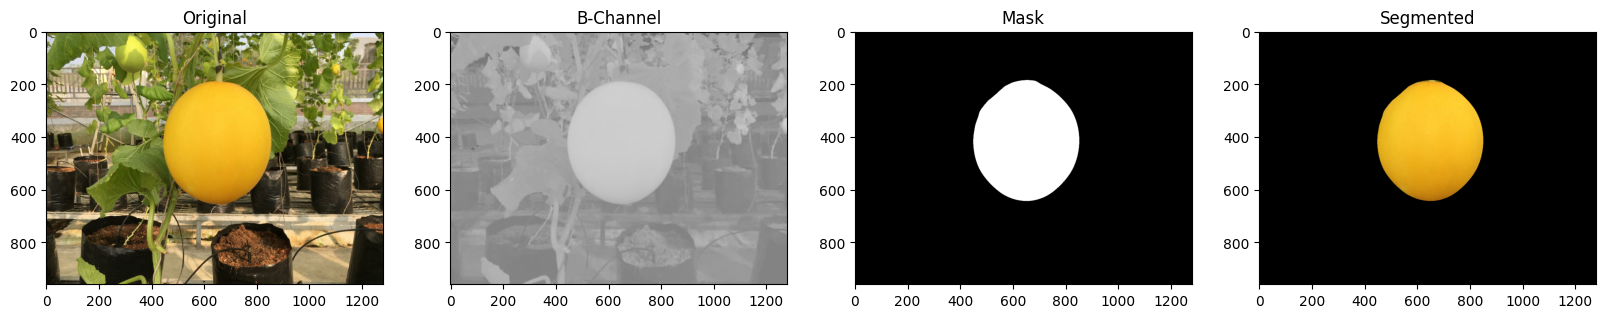

In [12]:
# Perbandingan citra original, channel, mask, dan segmented
fig, ax = plt.subplots(1, 4, figsize=(20,5), squeeze=False)

ax[0,0].set_title('Original')
ax[0,0].imshow(rgb_img, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title('B-Channel')
ax[0,1].imshow(bch, cmap='gray', vmin=0, vmax=255)
ax[0,2].set_title('Mask')
ax[0,2].imshow(mask, cmap='gray', vmin=0, vmax=255)
ax[0,3].set_title('Segmented')
ax[0,3].imshow(segmented, cmap='gray', vmin=0, vmax=255)

plt.show()

9. Berikan penjelasan mengenai pemilihan color space dan nilai threshold yang digunakan untuk segmentasi objek berdasarkan warna tersebut.

Seperti yang sudah dibahas pada langkah sebelumnya, pemilihan channel disesuaikan ditentukan melalui citra yang memungkinkan untuk dijadikan background. Hal tersebut dilihat dari hasil perbandingan perbedaaan warna pada masing-masing channel yang kemudian digunakan untuk memilih salah satu color space yang paling memungkinkan untuk mengidentifikasi secara jelas objek melon dengan background dan melihat warna yang dihasilkan pada setiap channel. Berdasarkan perbandingan citra yang dihasilkan masing-masing chanel, dipilih b-channel (bch) pada L*a*b color space sebagai background karena terlihat perbedaan intensitas cahaya (kecerahan) warna antara melon dan backgroundnya. L*a*b color space dipilih karena memperhitungkan nilai kecerahan citra dan memisahkan antara objek dan latar belakang dengan jelas. Pada b-channel L*a*b color space warna antara melon dan backgroundnya tidak bercampur (melon nya berwarna abu-abu yang terang dibandingkan backgroundnya yang lebih pudar tua) sehingga terlihat perbedaannya, jika dibandingkan yang lain intensitas cahaya (kecerahan warna) antara melon dan backgroundnya sulit untuk diibedakan.

Nilai threshold yang digunakan adalah 178, hasil dari percobaan dengan berbagai nilai. Seperti yag sudah dibahas di langkah sebelumnya, nilai thresholding dapat diubah sesuai kebutuhan atau penyesuaian yang diinginkan. Penentuan nilai tresholding dilakukan secara random dengan mencoba berbagai nilai yang paling sesuai untuk menghasilkan segmentasi objek melon dengan background. Pada kasus ini, nilai thresholdingnya adalah 178. Setelah proses thresholding, dilakukan proses penghilangan noise dengan menggunakan filter medianBlur pada mask dengan nilai 169. Pemilihan nilai 169 ini juga dilakukan setelah mencoba menyesuaikan beberapa percobaan nilai. Proses ini bertujuan untuk mengurangi noise pada mask sehingga hasilnya menjadi lebih bersih dan jelas. Selanjutnya, dilakukan segmentasi objek pada citra menggunakan mask yang telah dibuat sebelumnya. Proses segmentasi dilakukan dengan mengcopy citra input ke dalam citra baru yang bernama segmented. Proses segmentasi objek pada citra dilakukan dengan mengambil nilai pixel dari citra warna asli (rgb_img) pada lokasi di mana masker memiliki nilai 255, sedangkan di tempat lainnya nilai pixel diatur menjadi 0. Hal ini memungkinkan untuk memisahkan objek dari latar belakang secara jelas dalam citra hasil segmentasi. Dapat dilihat pada hasil akhirnya yaitu perbandingan citra original, channel, mask, dan hasil segmen